# Home task : KNN classification
1. `iris` dataset
    - load `iris` dataset
    - split to train and test
    - train KNN classifiers for different `K`
    - choose the best `K` determined on test set

2. synthetic dataset
    - generrate synthetic dataset
    - split to train and test
    - train KNN regressors for different `K`
    - choose the best `K` determined on test set
    - visualize the decision boundary 




## `Iris` dataset 

In [1]:
import pandas as pd 
import numpy as np 
np.random.seed = 2021
from sklearn.datasets import load_iris
iris = load_iris()
print ('data contains:',iris.keys())
X, y, labels, feature_names  = iris.data, iris.target, iris.target_names, iris['feature_names']
df_iris= pd.DataFrame(X, columns= feature_names) 
df_iris['label'] =  y
features_dict = {k:v for k,v in  enumerate(labels)}
df_iris['label_names'] = df_iris.label.apply(lambda x: features_dict[x])
df_iris

data contains: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,label_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X, y, random_state=0)

In [3]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)

In [4]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [5]:
knn.score(X_test, y_test)

0.9736842105263158

In [6]:
from sklearn.preprocessing import StandardScaler # sklearn 
scaler = StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

knn.fit(X_train_scaled, y_train)
knn.score(X_test_scaled, y_test)

0.9736842105263158

## Computing our best K number

In [7]:
my_score_best = 0.0
my_k_best = 0

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_scaled, y_train)
    score = knn.score(X_test_scaled, y_test)
    if my_score_best < score:
        my_k_best = k
        my_score_best = score
    print("score =", score, "k =", k)

print("score_best =", my_score_best, "k_best =", my_k_best)

score = 0.9210526315789473 k = 1
score = 0.9473684210526315 k = 2
score = 0.9736842105263158 k = 3
score = 0.9736842105263158 k = 4
score = 0.9736842105263158 k = 5
score = 0.9736842105263158 k = 6
score = 0.9736842105263158 k = 7
score = 0.9736842105263158 k = 8
score = 0.9736842105263158 k = 9
score = 0.9736842105263158 k = 10
score = 0.9736842105263158 k = 11
score = 0.9736842105263158 k = 12
score = 0.9736842105263158 k = 13
score = 0.9736842105263158 k = 14
score = 0.9736842105263158 k = 15
score = 0.9736842105263158 k = 16
score = 0.9736842105263158 k = 17
score = 0.9736842105263158 k = 18
score = 0.9210526315789473 k = 19
score = 0.9473684210526315 k = 20
score_best = 0.9736842105263158 k_best = 3


In [8]:
k_best = my_k_best # 'compute the best k'
score_best = my_score_best # 'compute the best score'
print ('The best k = {} , score = {}'.format(k_best,score_best ))

The best k = 3 , score = 0.9736842105263158


## Synthetic dataset  

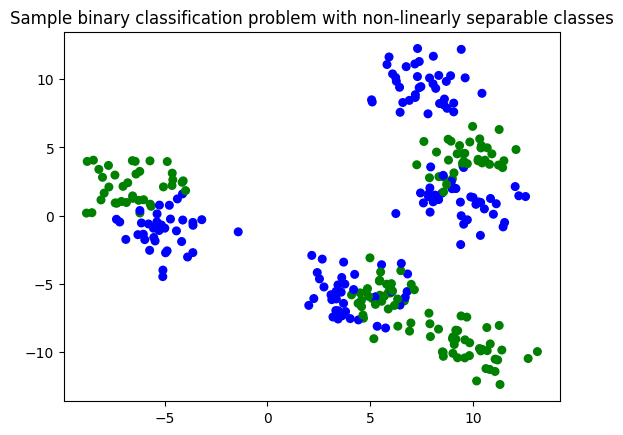

In [9]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
# %matplotlib notebook
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['blue','#FFFF00','black','green'])

np.random.seed= 2021
X_D2, y_D2 = make_blobs(n_samples = 300, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=30, cmap=cmap_bold)



In [10]:
from sklearn.preprocessing import MinMaxScaler
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)

scaler = MinMaxScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [11]:
my_score_best = 0.0
my_k_best = 0

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_scaled, y_train)
    score = knn.score(X_test_scaled, y_test)
    if my_score_best < score:
        my_k_best = k
        my_score_best = score
    print("score =", score, "k =", k)

print("score_best =", my_score_best, "k_best =", my_k_best)

score = 0.9333333333333333 k = 1
score = 0.8933333333333333 k = 2
score = 0.8933333333333333 k = 3
score = 0.88 k = 4
score = 0.9066666666666666 k = 5
score = 0.88 k = 6
score = 0.9333333333333333 k = 7
score = 0.9066666666666666 k = 8
score = 0.92 k = 9
score = 0.92 k = 10
score = 0.9066666666666666 k = 11
score = 0.8933333333333333 k = 12
score = 0.8933333333333333 k = 13
score = 0.92 k = 14
score = 0.8933333333333333 k = 15
score = 0.92 k = 16
score = 0.9333333333333333 k = 17
score = 0.9466666666666667 k = 18
score = 0.9333333333333333 k = 19
score = 0.9333333333333333 k = 20
score_best = 0.9466666666666667 k_best = 18


In [12]:
k_best = my_k_best # 'compute the best k'
score_best = my_score_best # 'compute the best score'
print ('The best k = {} , score = {}'.format(k_best,score_best ))

The best k = 18 , score = 0.9466666666666667


C:\Users\ilchi\AppData\Local\Temp\ipykernel_4668\2437282411.py:25: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X[y == label, 0], X[y == label, 1],


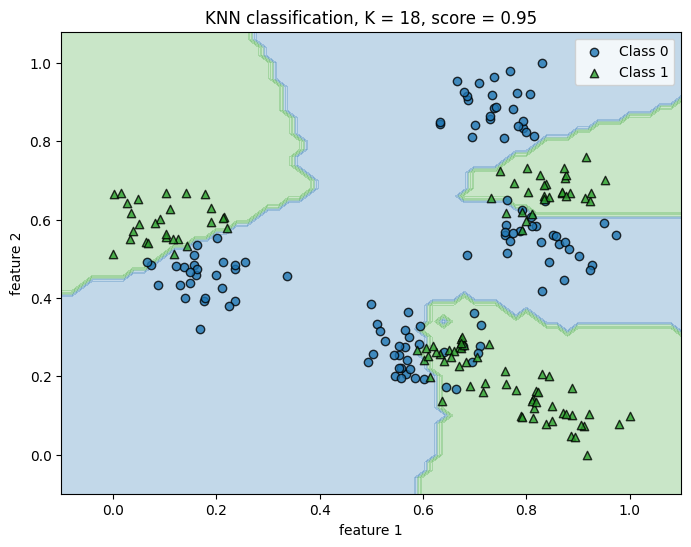

In [13]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


def plot_knn_decision_boundary(clf, X, y, X_test, y_test, title="KNN classification"):
    h = 0.02 

    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cmap_light = ListedColormap(['#377eb8', '#4daf4a'])
    cmap_bold = ListedColormap(['#1f77b4', '#2ca02c'])

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)

    markers = ['o', '^']
    labels = np.unique(y)
    for i, label in enumerate(labels):
        plt.scatter(X[y == label, 0], X[y == label, 1], 
                    c=cmap_bold(i), label=f'Class {label}', 
                    edgecolor='k', marker=markers[i], alpha=0.8)

    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title(f"{title}, K = {clf.n_neighbors}, score = {clf.score(X_test, y_test):.2f}")
    plt.legend()
    plt.show()


clf = KNeighborsClassifier(n_neighbors = k_best)
clf.fit(X_train_scaled, y_train)
score = clf.score(X_test_scaled, y_test)
plot_knn_decision_boundary(clf, X_train_scaled, y_train, X_test_scaled, y_test)
